### 분류 (Classification) 모델

<img src="https://velog.velcdn.com/images/newnew_daddy/post/09b3dfe6-03d8-460e-a593-692a036f60aa/image.png" width="50%">

#### 1. 개념
- 분류 모델은 주어진 입력 데이터에 대해 미리 정의된 클래스(레이블) 중 하나로 분류하는 모델
- 주어진 데이터를 바탕으로 새로운 데이터가 어떤 클래스에 속하는지 예측

#### 2. 주요 모델
1. **로지스틱 회귀 (Logistic Regression)**
2. **k-최근접 이웃 (k-Nearest Neighbors, k-NN)**
3. **서포트 벡터 머신 (Support Vector Machine, SVM)**
4. **나이브 베이즈 (Naive Bayes)**
5. **결정 트리 (Decision Tree)**
6. **랜덤 포레스트 (Random Forest)**

## 로지스틱 회귀 (Logistic Regression)
- 이진 분류 문제를 해결하기 위해 사용되는 통계적 모델
- 회귀 모델이지만 출력이 0~1 사이의 확률값을 가지므로 분류에 사용된다.
- 시그모이드 함수를 사용하여 확률값 출력

    $\sigma(x) = \frac{1}{1 + e^{-x}}$


### 1. 이중 분류 모델

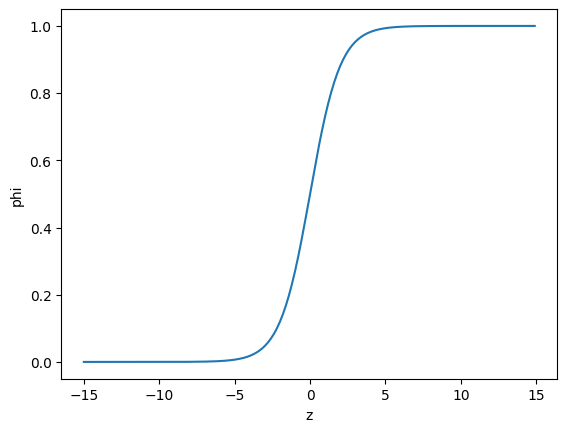

In [60]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-15, 15, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [61]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [62]:
np.unique(y)

array([0, 1, 2])

In [63]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    X, y, random_state=42)

In [64]:
iris_indexes = (train_target == 0) | (train_target == 1)

train_iris = train_input[iris_indexes]
target_iris = train_target[iris_indexes]

In [65]:
iris_indexes = (test_target == 0) | (test_target == 1)

test_iris = test_input[iris_indexes]
test_target_iris = test_target[iris_indexes]

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_iris, target_iris)

LogisticRegression()

In [68]:
## predict() : 예측 결과값
print(lr.predict(train_iris[:5]))

## predict_proba() : 예측 확률을 반환
print(lr.predict_proba(train_iris[:5]))

[0 0 1 1 0]
[[0.9803668  0.0196332 ]
 [0.98431226 0.01568774]
 [0.00957331 0.99042669]
 [0.0039438  0.9960562 ]
 [0.98284562 0.01715438]]


In [77]:
pd.concat([
    pd.DataFrame(lr.predict(test_iris), columns=['target']),
    pd.DataFrame(test_target_iris, columns=['pred'])],
    axis=1
    )

,target,pred
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [76]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.6607142857142857
0.6842105263157895


In [75]:
print(lr.classes_)
print(lr.coef_, lr.intercept_)

[0 1]
[[ 0.4082768  -0.87502692  2.16701442  0.89202485]] [-6.01421708]


In [23]:
## decision_function() : 모델이 학습한 선형 방정식의 출력을 반환

decisions = lr.decision_function(train_iris)
print(decisions)

[-3.91070483 -4.13906397  4.63915683  5.53165906 -4.04819866 -3.61819536
  3.04121891  4.83902727  4.03647547  4.73665439 -3.78237446  3.76799964
 -3.65404409 -3.9507011  -2.78297036  2.75368839 -2.7338476  -2.9522858
 -2.6896573   4.17065317 -3.47817033  3.85977029 -3.72400478  4.45731531
 -4.23158258  4.07046702  4.65499903  4.04643338 -3.18139289  2.05777743
 -3.64819676 -3.99409695  3.34712283  6.44767105 -3.29731761 -3.51899801
 -3.03298932  5.60184383  1.36269789  6.55188432  3.871428   -3.54315207
 -4.41078925 -3.41980065 -3.69317198 -3.8473562   6.32676738 -3.80980768
 -3.89987855  5.37249588  5.49581034  5.47743693 -3.61147965  4.20903311
  2.514466    3.44644062  5.06829175 -3.1048072   5.27073036  4.56152859
 -3.65902304  3.69144366 -3.56227343  1.92944706 -4.040735   -3.42651636
  6.04671731  3.90727672  5.23986058  4.53897067 -2.9222844   3.853886
 -4.36749704  3.81720586]


In [86]:
def sig(z):
    return 1 / (1 + np.exp(-z))

list(map(lambda x: float(sig(x)), decisions))

[0.01963319892091842,
 0.015687735268788548,
 0.9904266899984402,
 0.9960562004267518,
 0.01715437768987929,
 0.026129958820412545,
 0.9544019041096097,
 0.9921474020943103,
 0.9826468452110074,
 0.9913082772197565,
 0.02226169724058853,
 0.9774232606304113,
 0.025233042233692323,
 0.01887797210932401,
 0.05825139317905011,
 0.9401213186361393,
 0.061005385300871365,
 0.04962858946155603,
 0.06358642088120876,
 0.9847926638851805,
 0.029939774006060647,
 0.9793620604750651,
 0.023568240867291534,
 0.9885394212769439,
 0.01432129881374658,
 0.983217059995271,
 0.9905757392619677,
 0.9828158340929015,
 0.03987197673484306,
 0.8867311292040458,
 0.02537726514550954,
 0.018090771027020204,
 0.9660104928855315,
 0.9984182983304895,
 0.035663325682482275,
 0.028776486799952553,
 0.04595758092112388,
 0.9963225219975509,
 0.7961978254399081,
 0.9985746112995778,
 0.9795963740350679,
 0.02810904860295634,
 0.011999843464167055,
 0.03168234353597144,
 0.024288310058514236,
 0.020890352158786197

In [24]:
## 시그모이드 함수

from scipy.special import expit

print(expit(decisions))

[0.0196332  0.01568774 0.99042669 0.9960562  0.01715438 0.02612996
 0.9544019  0.9921474  0.98264685 0.99130828 0.0222617  0.97742326
 0.02523304 0.01887797 0.05825139 0.94012132 0.06100539 0.04962859
 0.06358642 0.98479266 0.02993977 0.97936206 0.02356824 0.98853942
 0.0143213  0.98321706 0.99057574 0.98281583 0.03987198 0.88673113
 0.02537727 0.01809077 0.96601049 0.9984183  0.03566333 0.02877649
 0.04595758 0.99632252 0.79619783 0.99857461 0.97959637 0.02810905
 0.01199984 0.03168234 0.02428831 0.02089035 0.99821539 0.02167234
 0.01984267 0.99537892 0.99591284 0.99583737 0.0263014  0.98535688
 0.92514974 0.96912481 0.99374619 0.0429094  0.99488643 0.98966191
 0.02511087 0.9756707  0.02759136 0.87318821 0.01728067 0.03147696
 0.99763997 0.98030071 0.99472696 0.98942855 0.0510629  0.97924279
 0.0125241  0.97848396]


### 2. 다중 분류 모델

In [79]:
import pandas as pd

fish = pd.read_csv('fish.csv')

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [80]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

fish_target = fish['Species'].to_numpy()

In [81]:
set(fish_target)

{'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'}

In [82]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [84]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [88]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [96]:
print(lr.predict(test_scaled))

proba = lr.predict_proba(test_scaled)
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Roach' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch'
 'Roach' 'Roach' 'Parkki' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.319 0.014 0.639 0.001 0.018]
 [0.    0.002 0.803 0.002 0.181 0.    0.011]
 [0.    0.    0.022 0.978 0.    0.    0.   ]
 [0.984 0.003 0.    0.    0.001 0.    0.013]
 [0.047 0.    0.817 0.008 0.002 0.    0.126]
 [0.992 0.005 0.    0.    0.    0.    0.003]
 [0.007 0.907 0.002 0.    0.076 0.    0.009]
 [0.999 0.001 0.    0.    0.    0.    0.   ]
 

In [98]:
[lr.classes_[int(np.argmax(i))] for i in proba]

['Perch',
 'Smelt',
 'Pike',
 'Roach',
 'Perch',
 'Bream',
 'Smelt',
 'Roach',
 'Perch',
 'Pike',
 'Bream',
 'Perch',
 'Bream',
 'Parkki',
 'Bream',
 'Bream',
 'Perch',
 'Perch',
 'Perch',
 'Bream',
 'Smelt',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Perch',
 'Perch',
 'Roach',
 'Smelt',
 'Smelt',
 'Pike',
 'Perch',
 'Perch',
 'Pike',
 'Bream',
 'Perch',
 'Roach',
 'Roach',
 'Parkki',
 'Perch']